直线的斜率是：79.52
直线的截距是：10.92


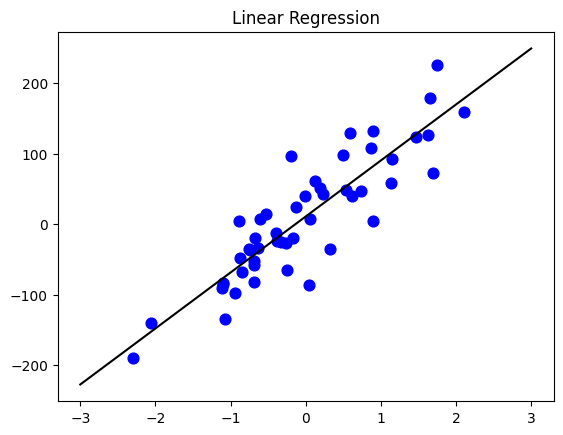

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=50, n_features=1, n_informative=1,
                       noise=50,random_state=1)
reg = LinearRegression()
reg.fit(X,y)
z = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X,y,c='b',s=60)
plt.plot(z, reg.predict(z),c='k')
plt.title('Linear Regression')

print('直线的斜率是：{:.2f}'.format(reg.coef_[0]))
print('直线的截距是：{:.2f}'.format(reg.intercept_))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=100,n_features=2,n_informative=2,random_state=38)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_[:]))
print("lr.intercept_: {}".format(lr.intercept_))

print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))

lr.coef_: [70.38592453  7.43213621]
lr.intercept_: -1.4210854715202004e-14
训练数据集得分：1.00


In [6]:
#载入糖尿病情数据集，将数据集拆分成训练集和测试集，使用线性回归模型进行拟合。
from sklearn.datasets import load_diabetes
X, y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)
lr = LinearRegression().fit(X_train, y_train)
X.shape, y.shape




((442, 10), (442,))

In [18]:
#输出这个模型针对训练数据集和测试数据集的得分。
print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分：0.53
测试数据集得分：0.46


In [19]:
#导入岭回归
from sklearn.linear_model import Ridge
#使用岭回归对数据进行拟合
ridge = Ridge().fit(X_train, y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("岭回归的训练数据集得分：{:.2f}".format(ridge.score(X_train, y_train)))
print("岭回归的测试数据集得分：{:.2f}".format(ridge.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

岭回归的训练数据集得分：0.43
岭回归的测试数据集得分：0.43







In [20]:
#修改alpha参数为10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("训练数据集得分：{:.2f}".format(ridge10.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(ridge10.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

训练数据集得分：0.15
测试数据集得分：0.16







In [23]:
#修改alpha值为0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("训练数据得分：{:.2f}".format(ridge01.score(X_train, y_train)))
print("测试数据得分：{:.2f}".format(ridge01.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

训练数据得分：0.52
测试数据得分：0.47







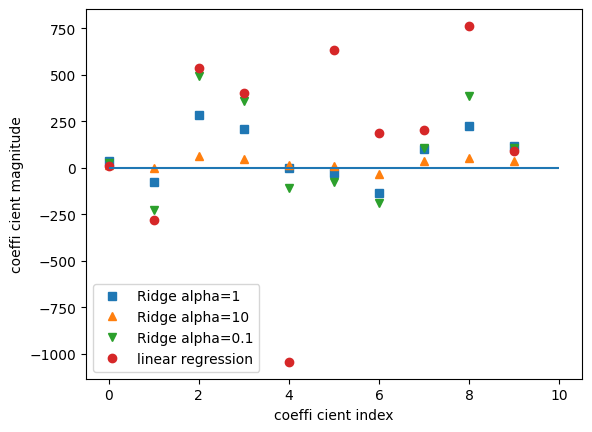

In [28]:
#绘制alpha=1时的模型系数
plt.plot(ridge.coef_, 's', label = 'Ridge alpha=1')
#绘制alpha=10时的模型系数
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha=10')
#绘制alpha=0.1时的模型系数
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha=0.1')
#绘制线性回归的系数作为对比
plt.plot(lr.coef_, 'o', label = 'linear regression')
plt.xlabel("coeffi cient index")
plt.ylabel("coeffi cient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.legend()

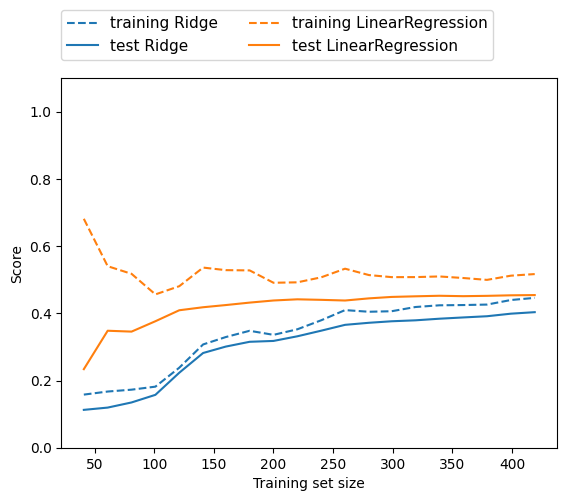

In [29]:
from sklearn.model_selection import learning_curve,KFold
#定义一个绘制学习曲线的函数
def plot_learning_curve(est, X, y):
#将数据进行20次拆分用来对模型进行评分
    training_set_size,train_scores, test_scores = learning_curve(
        est,X, y,train_sizes=np.linspace(.1, 1, 20), cv=KFold(20,shuffle=True, 
                                                              random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
 



plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)